In [1]:
import os

os.listdir("./input")

['padgett.xml']

In [2]:
import xml.etree.ElementTree as ET
tree = ET.parse('./input/padgett.xml')
root = tree.getroot()

In [3]:
nodes_xml = root[0][0][0]
PADGM_xml = root[0][1][0]
PADGB_xml = root[0][1][1]

In [4]:
nodes = []
for child in nodes_xml:
    nodes.append(child.get('id'))

print(nodes)

['ACCIAIUOL', 'ALBIZZI', 'BARBADORI', 'BISCHERI', 'CASTELLAN', 'GINORI', 'GUADAGNI', 'LAMBERTES', 'MEDICI', 'PAZZI', 'PERUZZI', 'PUCCI', 'RIDOLFI', 'SALVIATI', 'STROZZI', 'TORNABUON']


In [5]:
PADGM = []
for child in PADGM_xml:
    if (child.get('value') == "1.0000"):
        edge = []
        edge.append(child.get('source'))
        edge.append(child.get('target'))
        edge_reversed = []
        edge_reversed.append(child.get('target'))
        edge_reversed.append(child.get('source'))
        if (not(edge_reversed in PADGM)):
            PADGM.append(edge)

print(PADGM)

[['ACCIAIUOL', 'MEDICI'], ['ALBIZZI', 'GINORI'], ['ALBIZZI', 'GUADAGNI'], ['ALBIZZI', 'MEDICI'], ['BARBADORI', 'CASTELLAN'], ['BARBADORI', 'MEDICI'], ['BISCHERI', 'GUADAGNI'], ['BISCHERI', 'PERUZZI'], ['BISCHERI', 'STROZZI'], ['CASTELLAN', 'PERUZZI'], ['CASTELLAN', 'STROZZI'], ['GUADAGNI', 'LAMBERTES'], ['GUADAGNI', 'TORNABUON'], ['MEDICI', 'RIDOLFI'], ['MEDICI', 'SALVIATI'], ['MEDICI', 'TORNABUON'], ['PAZZI', 'SALVIATI'], ['PERUZZI', 'STROZZI'], ['RIDOLFI', 'STROZZI'], ['RIDOLFI', 'TORNABUON']]


In [6]:
PADGB = []
for child in PADGB_xml:
    if (child.get('value') == "1.0000"):
        edge = []
        edge.append(child.get('source'))
        edge.append(child.get('target'))
        edge_reversed = []
        edge_reversed.append(child.get('target'))
        edge_reversed.append(child.get('source'))
        if (not(edge_reversed in PADGM)):
            PADGB.append(edge)

print(PADGB)

[['BARBADORI', 'CASTELLAN'], ['BARBADORI', 'GINORI'], ['BARBADORI', 'MEDICI'], ['BARBADORI', 'PERUZZI'], ['BISCHERI', 'GUADAGNI'], ['BISCHERI', 'LAMBERTES'], ['BISCHERI', 'PERUZZI'], ['CASTELLAN', 'LAMBERTES'], ['CASTELLAN', 'PERUZZI'], ['GINORI', 'BARBADORI'], ['GINORI', 'MEDICI'], ['GUADAGNI', 'LAMBERTES'], ['LAMBERTES', 'BISCHERI'], ['LAMBERTES', 'CASTELLAN'], ['LAMBERTES', 'PERUZZI'], ['MEDICI', 'GINORI'], ['MEDICI', 'PAZZI'], ['MEDICI', 'SALVIATI'], ['MEDICI', 'TORNABUON'], ['PAZZI', 'MEDICI'], ['PERUZZI', 'BARBADORI'], ['PERUZZI', 'LAMBERTES']]


In [7]:
import igraph as ig

In [8]:
G_PADGM = ig.Graph()
G_PADGB = ig.Graph()

In [9]:
G_PADGM.add_vertices(nodes) 
G_PADGB.add_vertices(nodes)

In [10]:
G_PADGM.add_edges(PADGM)
G_PADGB.add_edges(PADGB)

In [11]:
g_pr = G_PADGM.pagerank(damping=0.85)
for i, num in enumerate(g_pr): g_pr[i] = g_pr[i] * 30 * len(g_pr) 

visual_style = {}
visual_style["vertex_size"] = g_pr
visual_style["vertex_label"] = G_PADGM.vs["name"]
visual_style["edge_curved"] = 0

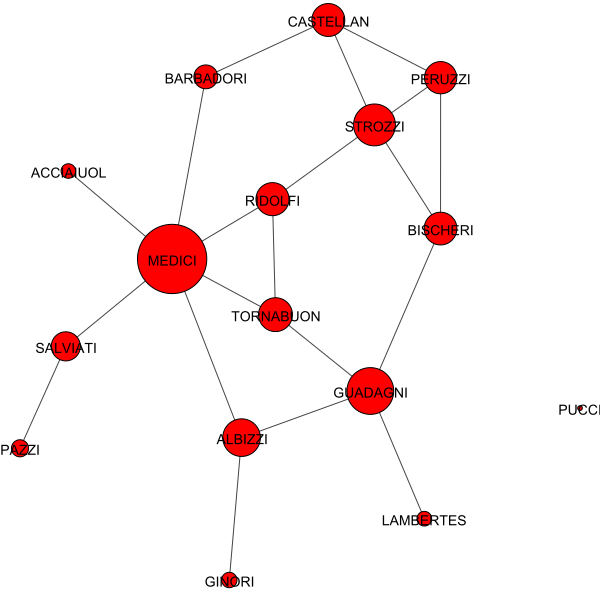

In [12]:
ig.plot(G_PADGM, **visual_style)

In [13]:
g_pr = G_PADGB.pagerank(damping=0.85)
for i, num in enumerate(g_pr): g_pr[i] = g_pr[i] * 30 * len(g_pr) 

visual_style = {}
visual_style["vertex_size"] = g_pr
visual_style["vertex_label"] = G_PADGB.vs["name"]
visual_style["edge_curved"] = 0

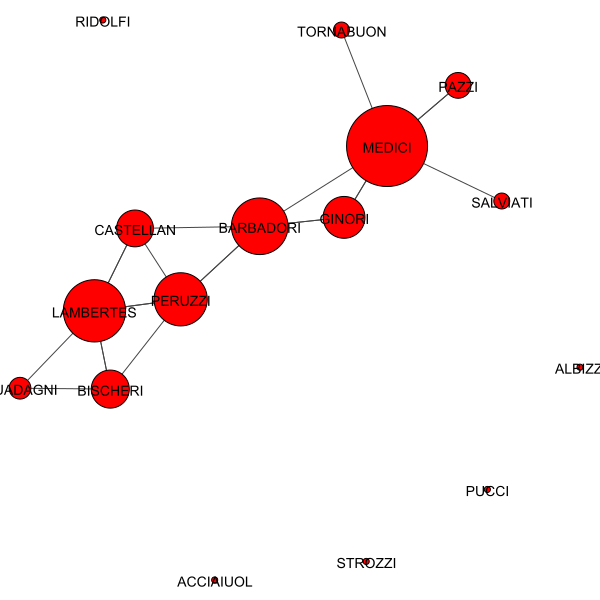

In [14]:
ig.plot(G_PADGB, **visual_style)

In [15]:
rank_list_PADGM = list(zip(G_PADGM.vs["name"],G_PADGM.pagerank(damping=0.85)))
rank_list_PADGM.sort(key=lambda rank_list_PADGM: rank_list_PADGM[1], reverse=True)

print(rank_list_PADGM)

[('MEDICI', 0.14437347029461567), ('GUADAGNI', 0.09742359739588866), ('STROZZI', 0.08722617675169834), ('ALBIZZI', 0.07833886422155682), ('TORNABUON', 0.07057394635579498), ('RIDOLFI', 0.06888541241795826), ('CASTELLAN', 0.0686437381637337), ('BISCHERI', 0.06817999565707625), ('PERUZZI', 0.06720327724130862), ('SALVIATI', 0.06069626610552725), ('BARBADORI', 0.049802957537138336), ('PAZZI', 0.035696903193858986), ('GINORI', 0.032097001628451), ('LAMBERTES', 0.03060350454563624), ('ACCIAIUOL', 0.030353898390747123), ('PUCCI', 0.009900990099009905)]


In [16]:
rank_list_PADGB = list(zip(G_PADGB.vs["name"],G_PADGB.pagerank(damping=0.85)))
rank_list_PADGB.sort(key=lambda rank_list_PADGB: rank_list_PADGB[1], reverse=True)

print(rank_list_PADGB)

[('MEDICI', 0.16877899863769408), ('LAMBERTES', 0.12973138689772334), ('BARBADORI', 0.11802466968580075), ('PERUZZI', 0.11085202005275566), ('GINORI', 0.08719546590789204), ('BISCHERI', 0.07925445354960275), ('CASTELLAN', 0.07669634912064635), ('PAZZI', 0.053755142830248494), ('GUADAGNI', 0.045360625806536936), ('SALVIATI', 0.03326055013852851), ('TORNABUON', 0.03326055013852851), ('ACCIAIUOL', 0.012765957446808515), ('ALBIZZI', 0.012765957446808515), ('PUCCI', 0.012765957446808515), ('RIDOLFI', 0.012765957446808515), ('STROZZI', 0.012765957446808515)]
